# Spotify Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from ast import literal_eval

CRISP-DM Steps followed below: Business Understanding, Data Understanding, Data Preparation, Modelling, Evaluation, Deployment

## Business Understanding

In [2]:
# Music is a huge part of our everyday lives, from radio to streaming services, live music, advertising, film and other forms of entertainment
# As a musician myself, I am interested to understand what data is publicly available from streaming service Spotify and explore this further
# Spotify is used by over 400 million people in the world on a monthly basis

# No two pieces of music are the same, and we can broadly categorise music into different genres, or styles
# Certain artists are more popular than others - who hasn't heard of Adele or Ed Sheeran?


Business questions:

1. Which genres have the biggest fanbases?

2. How have audio features of music changed over time?

3. Which audio features of a track have the biggest influence on popularity?

## Data Understanding

In [3]:
# Source: https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks
# https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

# Working with two datasets: tracks and artists
# tracks contains identifying and audio features of 600k+ tracks on Spotify released between 1922-2021
# Artists contains identifying and popularity metrics of 1M+ artists on Spotify

tracks = pd.read_csv('tracks.csv', converters={'artists': literal_eval, 'id_artists': literal_eval}).set_index('id')
artists = pd.read_csv('artists.csv', converters={'genres': literal_eval}).set_index('id')

In [4]:
# Uncomment to run various methods to understand the tracks dataset

# tracks.head()
# tracks.shape
# tracks.info()
# tracks.describe()

In [5]:
# Uncomment to run various methods to understand the artists dataset

# artists.head()
# artists.shape
# artists.info()
# artists.describe()

### Question 1: Which genres have the biggest fanbases?

In [6]:
# Sample some rows from artists and return the genres column to visualise the format of this data
artists['genres'].sample(10)

id
28INUgyzTTRbvSphrJbgZ2    [nantes indie, turntablism]
71VuCoG9B5Qb5Ma1GG60K4                             []
7onFdYmMtBSG0ivX8u7snk                             []
1lZifqpj6bfZfealLI3Czz             [hard alternative]
3CRxykbTRye9k5AGAo9QFW                             []
4RpEZWZJpdKdmQPB2cbgWm                             []
41N7ahwwAO6lgAjHxvsNx8                     [football]
7DzpPG5ukmld81XKo31s7P                             []
3Mg1CkJoitOIV9cbNE2w2E                             []
7hGPoS9avyn8CoZcKZMVqF             [classic indo pop]
Name: genres, dtype: object

In [7]:
# Create column to indicate whether there are multiple genres for an artist
def genre_count(x):
    '''
    INPUT:
    x - list of genres 
    OUTPUT:
    y - an indicator of genre count
    
    Function to map an input list of genres to an indicator to identify whether that list contains a single genre, 
    multiple genres or no genres at all.
    '''
    if len(x) == 1:
        y = 'single genre'
    elif len(x) > 1:
        y = 'multiple genres'
    else:
        y = 'no genres'
    return y

# Apply the function genre_count to the 'genres' column in the artists dataframe to create an indicator column 'genre_count'ind
artists['genre_count_ind'] = artists['genres'].apply(genre_count)

In [8]:
# Subset to those artists with at least one genre
artists_with_genres = artists[artists['genre_count_ind'] != 'no genres']

In [9]:
# Explode the dataframe so that there is now one row per genre per artist
artists_new = artists_with_genres.explode('genres')

In [10]:
# Group by genre to calculate summary statistics
genre_groupby = artists_new.groupby(by = 'genres')['followers'].agg(['sum','mean','median','std'])

In [11]:
# Sort by number of artists associating with each genre to get a measure of most popular genres
genre_stats = genre_groupby.sort_values(by = 'sum', ascending = False)

In [12]:
genre_stats

,sum,mean,median,std
genres,,,,
pop,2.042591e+09,3.596111e+06,1100479.0,7.323358e+06
dance pop,1.419018e+09,2.480800e+06,887637.0,4.648934e+06
post-teen pop,1.101120e+09,2.627972e+06,573644.0,6.229245e+06
rock,8.899567e+08,1.577937e+06,692970.0,3.123087e+06
rap,8.617128e+08,1.869225e+06,638910.0,4.259105e+06
...,...,...,...,...
chhattisgarhi pop,1.090000e+02,3.633333e+01,33.0,3.611556e+01
school ensemble,1.060000e+02,1.325000e+01,8.0,1.304662e+01
swazi traditional,7.800000e+01,7.800000e+01,78.0,NaN


In [13]:
# Given there are 5366 different genres in the artists_new dataframe, let's take a subset of the most popular to analyse

In [14]:
# Subset to the top 10 genres
genre_stats_10 = genre_stats.sort_values(by='sum', ascending=False).iloc[:10,]
top_10_genres_list = list(genre_stats_10.index)

In [15]:
genre_stats_10

,sum,mean,median,std
genres,,,,
pop,2.042591e+09,3.596111e+06,1100479.0,7.323358e+06
dance pop,1.419018e+09,2.480800e+06,887637.0,4.648934e+06
post-teen pop,1.101120e+09,2.627972e+06,573644.0,6.229245e+06
rock,8.899567e+08,1.577937e+06,692970.0,3.123087e+06
rap,8.617128e+08,1.869225e+06,638910.0,4.259105e+06
latin,7.833771e+08,1.573046e+06,456669.0,3.507018e+06
pop rap,7.601560e+08,1.627743e+06,651767.0,3.387791e+06
hip hop,6.456499e+08,1.333987e+06,455054.5,3.661847e+06
trap latino,4.792756e+08,1.566260e+06,250107.0,3.869952e+06


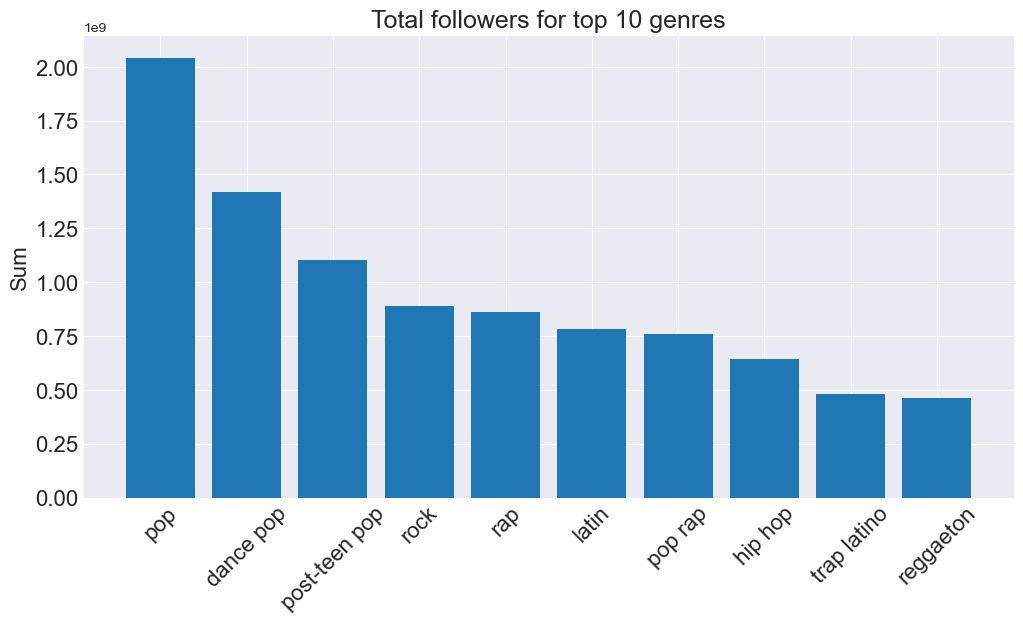

In [54]:
# Plot statistics for top 10 genres

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x = genre_stats_10.index, height = genre_stats_10['sum'])
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_title('Total followers for top 10 genres', fontsize = 18)
ax.set_ylabel('Sum', fontsize = 16)

plt.savefig('Top genre sum', bbox_inches='tight')
plt.show()

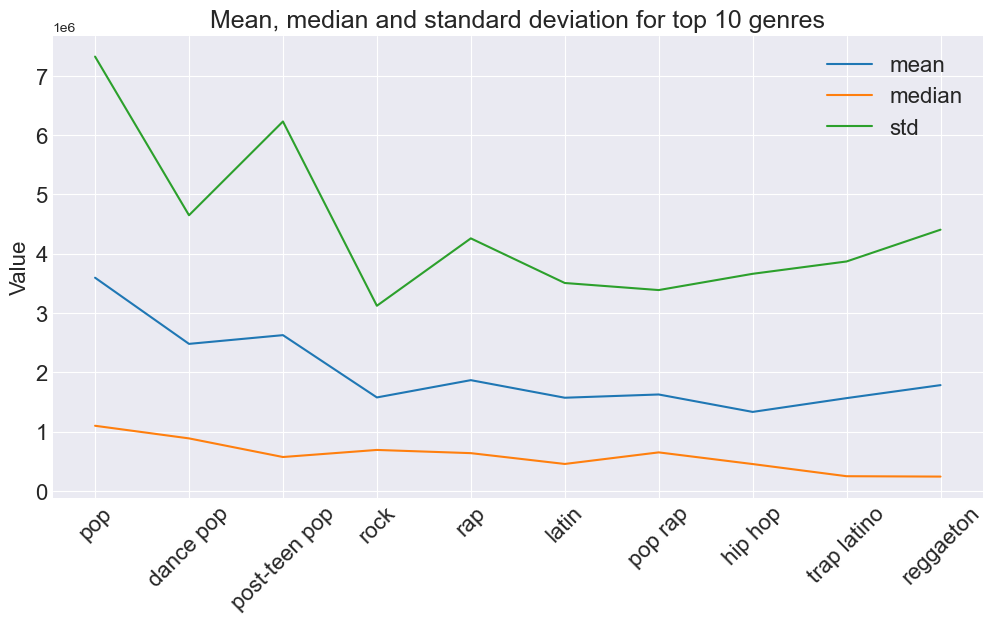

In [55]:
# Plot statistics for top 10 genres

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(12, 6))
for stat in ['mean', 'median', 'std']:
    ax.plot(genre_stats_10.index, genre_stats_10[stat], label = stat)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_title('Mean, median and standard deviation for top 10 genres', fontsize = 18)
ax.set_ylabel('Value', fontsize = 16)
ax.legend(fontsize = 16)

plt.savefig('Top genre statistics', bbox_inches = 'tight')
plt.show()

In [17]:
# These plots show us that pop is the most popular genre by some margin 
# (artists with pop listed as a genre have a combined follower count of over 2 billion)

# Besides sum of followers, it is also interesting to look at the mean, median and standard deviation of these data
# The right plot shows that mean is higher than median, and std higher even still, which means we have very skewed data
# We can demonstrate this distributional inbalance further with a boxplot example

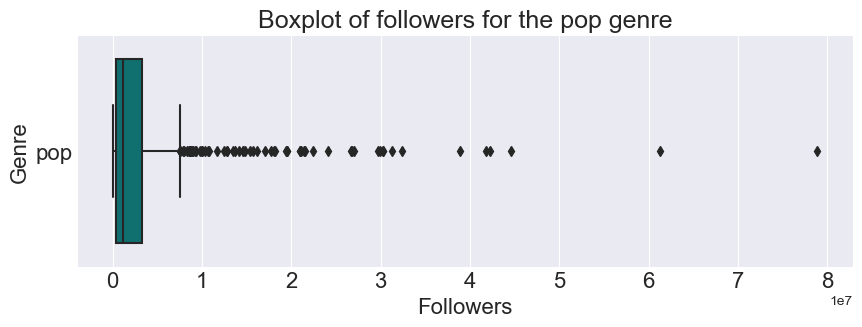

In [63]:
# Plot boxplot for the pop genre
plt.subplots(figsize=(10,3))
sns.boxplot(data = artists_new[artists_new['genres']=='pop'], x = 'followers', y = 'genres', color='teal')
plt.title('Boxplot of followers for the pop genre', fontsize = 18)
plt.xlabel('Followers', fontsize = 16)
plt.ylabel('Genre', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig('Boxplot of followers for the pop genre', bbox_inches = 'tight')
plt.show()

In [19]:
# From this analysis we can conclude that some genres do indeed have higher follower counts, but only on average
# Over half of pop artists have a follower count over 1 million
# However this data is very skewed so we cannot say for example that you will have a large follower count if you write pop music

In [64]:
artists.sort_values(by = 'followers', ascending = False)

,followers,genres,name,popularity,genre_count_ind
id,,,,,
6eUKZXaKkcviH0Ku9w2n3V,78900234.0,"[pop, uk pop]",Ed Sheeran,92,multiple genres
66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"[pop, post-teen pop]",Ariana Grande,95,multiple genres
3TVXtAsR1Inumwj472S9r4,54416812.0,"[canadian hip hop, canadian pop, hip hop, pop ...",Drake,98,multiple genres
1uNFoZAHBGtllmzznpCI3s,44606973.0,"[canadian pop, pop, post-teen pop]",Justin Bieber,100,multiple genres
7dGJo4pcD2V6oG8kP0tJRR,43747833.0,"[detroit hip hop, hip hop, rap]",Eminem,94,multiple genres
...,...,...,...,...,...
41c30F8zy5UCTSevbn0WfD,NaN,[mexican electronic],Broadband Star,0,single genre
1DK979aOesiZ4Vkus8txqu,NaN,[],AmorArtis Orchestra & Johannes Somary,2,no genres
2lr0R5vHGfI0C489h0r6qV,NaN,[dc indie],Black Dog Prowl,16,single genre


### Question 2: How have audio features of music changed over time?

In [20]:
# Convert date to datetime format
tracks['release_date'] = pd.to_datetime(tracks['release_date'])

In [21]:
# Extract release year
tracks['release_year'] = tracks['release_date'].dt.year

In [22]:
# Display tracks sorted by release year
display(tracks.head())

,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
id,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


In [23]:
# Subset tracks to remove tracks with incorrect date format (i.e. defaulting to 1900-01-01)
tracks2 = tracks[tracks['release_year']>=1922]

In [24]:
# Specify audio features to investigate
audio_features = ['danceability', 'energy', 'loudness', 
                  'mode', 'speechiness', 'acousticness', 
                  'instrumentalness','liveness', 'valence', 
                  'tempo']

tracks2[audio_features].describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000
mean,0.563594,0.542036,-10.206076,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464817
std,0.166103,0.251923,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764117
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.453000,0.343000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000
50%,0.577000,0.549000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000
75%,0.686000,0.748000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000
max,0.991000,1.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


In [25]:
# Subset to audio features with ranges [0,1]
audio_features_0to1 = ['danceability', 'energy', 'mode', 
                         'speechiness', 'acousticness', 'instrumentalness',
                         'liveness', 'valence']

In [26]:
# Calculate mean of each feature by year
year_feature_groupby = tracks2.groupby(by = 'release_year')[audio_features_0to1].agg('mean')
year_feature_groupby

,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence
release_year,,,,,,,,
1922,0.533320,0.324054,0.738095,0.246295,0.898857,0.324971,0.250670,0.563605
1923,0.637332,0.266977,0.797565,0.552072,0.859965,0.157659,0.225396,0.671967
1924,0.593344,0.356725,0.693523,0.375208,0.866266,0.339628,0.203447,0.554935
1925,0.617391,0.263749,0.764120,0.305693,0.912170,0.275384,0.255157,0.635196
1926,0.622113,0.263075,0.705841,0.356952,0.785739,0.323416,0.211447,0.539702
...,...,...,...,...,...,...,...,...
2017,0.624972,0.659730,0.583274,0.100517,0.278547,0.089228,0.200736,0.493965
2018,0.634510,0.652202,0.566843,0.108212,0.278446,0.098398,0.198216,0.483251
2019,0.649724,0.637066,0.567565,0.111168,0.293902,0.081428,0.189971,0.494212


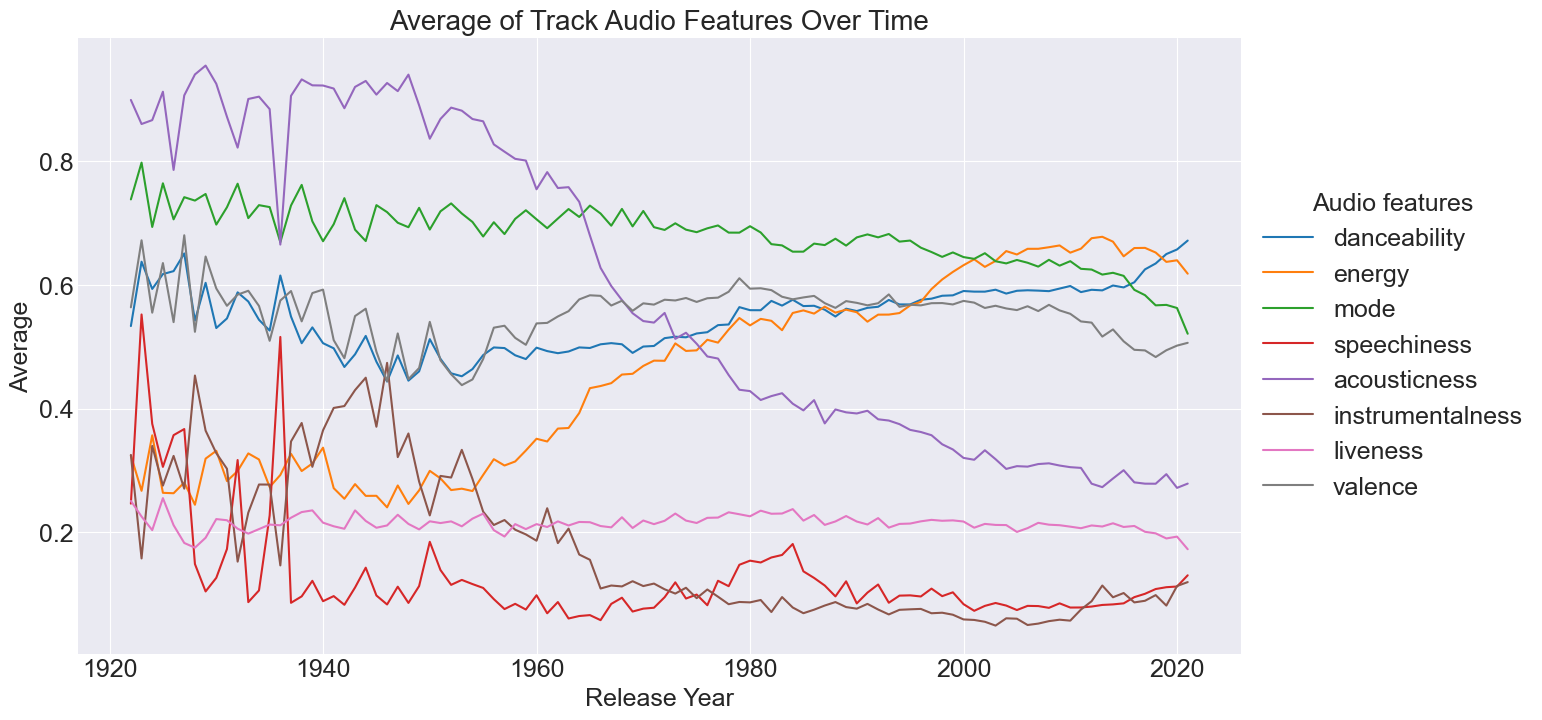

In [66]:
# Plot audio features over time

# create plot
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(year_feature_groupby)
ax.tick_params(axis='both', labelsize=18)
ax.set_title('Average of Track Audio Features Over Time', fontsize = 20)
ax.set_xlabel('Release Year', fontsize = 18)
ax.set_ylabel('Average', fontsize = 18)
ax.legend(labels = year_feature_groupby.columns, 
          title = 'Audio features',
          loc = 'center left',
          bbox_to_anchor = (1,0,0.5,1),
          fontsize = 18
         ).get_title().set_fontsize('18')

plt.savefig('Average of Track Audio Features Over Time', bbox_inches='tight')
plt.show()

In [67]:
# Conclusions from this plot:

# Gradual increase in danceability since the 1970s
# Increase in energy over time
# On average major modes but tending more towards minor in recent years
# Speechiness bump in 1980 - popularity of rap?
# Acousticness decreased sharply over time - decrease in acoustic music. Conversely we could probably infer that there has been an increase in electronic music
# Instrumentalness predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
# Liveness has remainded fairly consistent (probability of audience presence in the recording)

## Data Preparation

### Tracks

In [68]:
# Change key signature and time signature to categorical variables 
# Rationale: from musical context these wouldn't make sense in a model as sequential numbered features

In [69]:
# Map key column to categorical key signatures
key_sig_map = {0:'C',
               1:'C#/Db',
               2:'D',
               3:'D#/Eb',
               4:'E',
               5:'F',
               6:'F#/Gb',
               7:'G',
               8:'G#/Ab',
               9:'A',
               10:'A#/Bb',
               11:'B',
               (-1):'no key'}

tracks2['key_sig'] = tracks2['key'].map(key_sig_map)

/Users/el_zy/opt/anaconda3/envs/jupyter-notebook/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
# Based on audio feature reference here: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features
# time_signature should only range from 3 to 7 so drop entries where this is not the case
tracks3 = tracks2[tracks2['time_signature'] >= 3]

In [71]:
# Convert time signature to data type object
tracks3['time_sig'] = tracks3['time_signature'].astype('object')

/Users/el_zy/opt/anaconda3/envs/jupyter-notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
# Subset tracks2 based on speechiness to remove exclusively speech-like recordings 
# (e.g. talk shows, podcasts, audio books, poetry)
tracks_new = tracks3[tracks3['speechiness']<=0.66]

In [73]:
# View first few row of tracks_new
tracks_new.head()

,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,key_sig,time_sig
id,,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,...,0.4510,0.674,0.7440,0.1510,0.1270,104.851,3,1922,C,3
07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,...,0.0512,0.994,0.0218,0.2120,0.4570,130.418,5,1922,C#/Db,5
08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,...,0.0504,0.995,0.9180,0.1040,0.3970,169.980,3,1922,G,3
08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922-01-01,0.402,0.1580,3,...,0.0390,0.989,0.1300,0.3110,0.1960,103.220,4,1922,D#/Eb,4
0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922-01-01,0.227,0.2610,5,...,0.0382,0.994,0.2470,0.0977,0.0539,118.891,4,1922,F,4


In [74]:
# View columns in tracks_new
tracks_new.columns

Index(['name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'release_year',
       'key_sig', 'time_sig'],
      dtype='object')

In [75]:
# View summary statistics for numerical variables in tracks_new
tracks_new.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
count,558839.000000,5.588390e+05,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000,558839.000000
mean,27.925431,2.331259e+05,0.045677,0.560793,0.549755,5.230639,-9.945968,0.658377,0.072542,0.440059,0.116910,0.207014,0.553545,119.304809,3.913710,1989.239822
std,18.458001,1.188371e+05,0.208783,0.166491,0.251451,3.515565,4.926455,0.474254,0.080286,0.350358,0.269957,0.178945,0.259769,29.419945,0.328716,22.572336
min,0.000000,1.546200e+04,0.000000,0.053200,0.000000,0.000000,-54.837000,0.000000,0.000000,0.000000,0.000000,0.005720,0.000000,30.946000,3.000000,1922.000000
25%,13.000000,1.792400e+05,0.000000,0.449000,0.355000,2.000000,-12.538000,0.000000,0.033700,0.087700,0.000000,0.097000,0.344000,96.429000,4.000000,1974.000000
50%,27.000000,2.174270e+05,0.000000,0.571000,0.560000,5.000000,-9.018000,1.000000,0.043200,0.398000,0.000035,0.135000,0.565000,118.298000,4.000000,1993.000000
75%,41.000000,2.653260e+05,0.000000,0.682000,0.756000,8.000000,-6.368000,1.000000,0.069100,0.778000,0.012200,0.266000,0.775000,137.038000,4.000000,2008.000000
max,100.000000,5.042185e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.660000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,2021.000000


In [76]:
# normalise speechiness, tempo, duration, etc.
features_to_normalise = ['popularity','duration_ms', 'loudness', 'speechiness', 'tempo']

In [77]:
# source: https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

# copy the data
tracks_new_normalised = tracks_new.copy()
  
# apply normalization techniques by Column 1
column = features_to_normalise
tracks_new_normalised[column] = (tracks_new_normalised[column] - tracks_new_normalised[column].min()) / (tracks_new_normalised[column].max() - tracks_new_normalised[column].min())    

tracks_new_normalised = tracks_new_normalised.rename(columns = {'tempo':'tempo_scaled', 'duration_ms':'duration_scaled', 'popularity':'popularity_scaled'})

# view normalized data
tracks_new_normalised.sample(10)

,name,popularity_scaled,duration_scaled,explicit,artists,id_artists,release_date,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled,time_signature,release_year,key_sig,time_sig
id,,,,,,,,,,,,,,,,,,,,,
28qGsKpDQucdS2T9oPSzi4,We'll Rise Again,0.28,0.039299,0,[Emadj],[6qndIEvgFHLSuVsWADtFnu],2014-07-02,0.570,0.937,5,...,0.089545,0.1270,0.353000,0.0643,0.198,0.529552,4,2014,F,4
7nGuT0EfqQ1TXcADEKwB6Q,Day Drunk,0.64,0.035696,0,[Morgan Evans],[6fzQ81ouajOEFqCIB9VwrS],2018-10-12,0.647,0.754,10,...,0.057273,0.0150,0.000000,0.0684,0.755,0.306631,4,2018,A#/Bb,4
6VfyQ2GFjBTqHK1B7IF9Ap,Some Other Spring,0.04,0.032945,0,[Billie Holiday],[1YzCsTRb22dQkh9lghPIrp],1939-01-01,0.596,0.151,5,...,0.050758,0.9120,0.000000,0.1040,0.214,0.249212,4,1939,F,4
7DKS0rX27cCEPsK0R6tFWS,Wasted Times,0.71,0.040748,1,[The Weeknd],[1Xyo4u8uXC1ZmMpatF05PJ],2018-03-30,0.560,0.678,10,...,0.088030,0.6100,0.000014,0.1110,0.290,0.425367,4,2018,A#/Bb,4
1tg7ZzCAkjDNENdWL7WuIr,Ojalá Te Animes,0.57,0.032844,0,[Bobby Pulido],[4EEZg8R3dxbTCCQ1DVWtHg],2005-01-01,0.821,0.785,2,...,0.100606,0.0577,0.000000,0.0227,0.971,0.665027,4,2005,D,4
24dXlCvgL0yCXVeCIGGxbu,Midnight To Six Man,0.09,0.024624,0,[The Pretty Things],[5U16QlMnlSAhkQxBZpLyLO],1965-12-01,0.533,0.672,9,...,0.048030,0.4570,0.006530,0.4650,0.929,0.443340,4,1965,A,4
212jEBJoFh60u3VJ3CI93b,Badge,0.18,0.027818,0,[Royals],[4IF8h0Yx1YhcIkbASbYtEV],1991-01-01,0.642,0.535,9,...,0.061515,0.3950,0.009210,0.0990,0.405,0.370938,4,1991,A,4
18ESXa5mEm1V4Pkt5GSXWx,Cherry Pie,0.63,0.036932,0,[Warrant],[7HLvzuM9p11k9lUQfSM4Rq],1990-05-01,0.407,0.955,2,...,0.248485,0.0251,0.000000,0.3470,0.508,0.680177,4,1990,D,4
0rm1ka34ZplDKGSV05XgkF,Under the Bridges of Paris,0.21,0.029255,0,[Eartha Kitt],[1AwO9pWEBSBoWdEZu28XDC],1956-01-01,0.306,0.179,9,...,0.050758,0.8740,0.000049,0.1250,0.406,0.683264,3,1956,A,3


In [78]:
# Get dummies for categorical variables

In [79]:
variables = ['popularity_scaled', 'duration_scaled', 'danceability', 
             'energy', 'loudness', 'mode', 
             'speechiness', 'acousticness', 'instrumentalness',
             'liveness', 'valence', 'tempo_scaled', 
             'key_sig', 'time_sig']
exp_variables = [var for var in variables if var != 'popularity_scaled']

In [80]:
# Subset the data to explanatory variables defined above
model_data = tracks_new_normalised[variables]
model_data.head()

,popularity_scaled,duration_scaled,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled,key_sig,time_sig
id,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,0.06,0.022170,0.645,0.4450,0.689203,1,0.683333,0.674,0.7440,0.1510,0.1270,0.343050,C,3
07A5yehtSnoedViJAZkNnc,0.00,0.033059,0.434,0.1770,0.558966,1,0.077576,0.994,0.0218,0.2120,0.4570,0.461726,C#/Db,5
08FmqUhxtyLTn6pAh6bk45,0.00,0.032117,0.321,0.0946,0.446349,1,0.076364,0.995,0.9180,0.1040,0.3970,0.645364,G,3
08y9GfoqCWfOGsKdwojr5e,0.00,0.029367,0.402,0.1580,0.630047,0,0.059091,0.989,0.1300,0.3110,0.1960,0.335479,D#/Eb,4
0BRXJHRNGQ3W4v9frnSfhu,0.00,0.032520,0.227,0.2610,0.705728,1,0.057879,0.994,0.2470,0.0977,0.0539,0.408221,F,4


In [81]:
# Create dummy variables for categorical features
# drop first due to multicollinearity (i.e. if a track is in the key of A, this can be explained by it not being 
# in any of the other keys)
X = pd.get_dummies(model_data[exp_variables], drop_first = True)

In [82]:
# Create target dataset
y = model_data['popularity_scaled']

In [83]:
# Recombine X and y into a dataframe for visualisation purposes
df = pd.concat([X,y],axis=1)

## Modelling

### Question 3: Which audio features of a track influence popularity? 

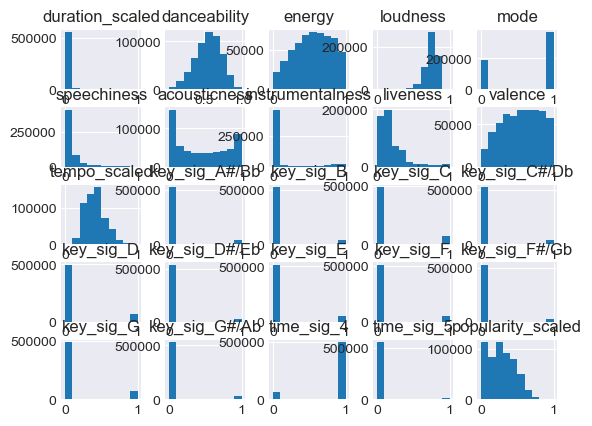

In [84]:
df.hist()
plt.show()

In [85]:
# From the above plot we can easily see the distribution of our variables

In [86]:
# Define X_train, X_test, y_train, y_test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

# Instantiate
lm_model = LinearRegression()
# Fit
lm_model.fit(X_train, y_train) 

#Predict
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train)

## Evaluation

In [87]:
# Score
r2_test = r2_score(y_test, y_test_preds)
r2_train = r2_score(y_train, y_train_preds)

print("The test r-squared score for the model was {} on {} values.".format(r2_test, len(y_test)))
print("The train r-squared score for the model was {} on {} values.".format(r2_train, len(y_train)))

The test r-squared score for the model was 0.21120924176246858 on 167652 values.
The train r-squared score for the model was 0.2112221262589702 on 391187 values.


In [88]:
# The model r-squared is low (explanatory variables are only accounting for 21% variance in the dependent variable)
# However to answer the business question we do not necessarily need a high r2 score, just a ranking of the impact each of these variables has on popularity score
# Similar test and train r2 scores indicate that overfitting is not a problem here

In [91]:
# Code taken from Udacity Nanodegree course

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data to extract column names from
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['audio_feature'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,audio_feature,coefs,abs_coefs
3,loudness,0.276736,0.276736
1,danceability,0.181494,0.181494
9,valence,-0.142846,0.142846
0,duration_scaled,0.127483,0.127483
6,acousticness,-0.126875,0.126875
7,instrumentalness,-0.101206,0.101206
8,liveness,-0.048799,0.048799
10,tempo_scaled,0.026438,0.026438
5,speechiness,0.021387,0.021387
2,energy,0.016454,0.016454


In [90]:
# The model coefficients indicate that the audio feature most important for predicting popularity is loudness, followed by danceability
# Key and time signatures appear to have very little to no impact on popularity. 
# I am surprised by this result as I expected songs in 4/4 and 3/4 time signature to be a bigger indicator of popularity than an unusual time signature of 5 for example


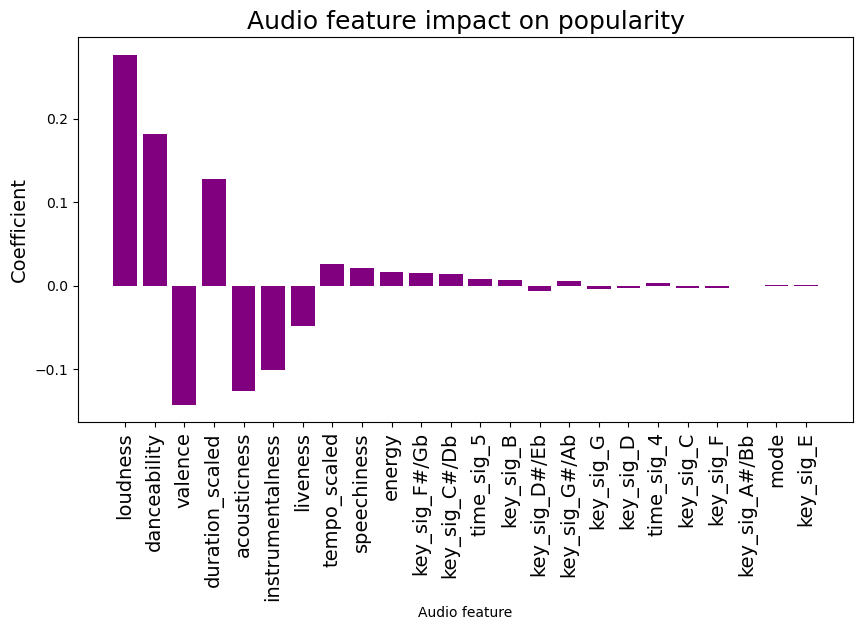

In [111]:
plt.style.use('default')
plt.subplots(figsize=(10,5))
plt.bar(coef_df['audio_feature'], coef_df['coefs'], color='purple')
plt.title('Audio feature impact on popularity', fontsize = 18)
plt.xlabel('Audio feature')
plt.ylabel('Coefficient', fontsize = 14)
plt.tick_params(axis = 'x', labelrotation = 90, labelsize = 14)
plt.savefig('Audio feature popularity regression coefficients', bbox_inches='tight')
plt.show()